**Detection of Social Network Spam Based on Improved Machine Learning**

1. Import Libraries

In [1]:
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from scipy import stats
import joblib

2. Import dataset

In [2]:
df = pd.read_csv("dataset_1.csv")

Display Heads

In [3]:
df.head(2)

,Profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
0,1,39,300,907,200,1000,850,922,0.49,0.55,0.56,0.47,40,14,1
1,2,150,350,30,300,300,100,290,0.33,0.96,0.50,1.20,10,4,0


Describe the dataset

In [4]:
df.describe()

,Profile id,#friends,#following,#community,age,#postshared,#urlshared,#photos/videos,fpurls,fpphotos/videos,avgcomment/post,likes/post,tags/post,#tags/post,Label
count,5.000000,5.000000,5.000000,5.00000,5.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,3.000000,107.600000,262.000000,359.40000,423.0000,960.000000,820.000000,922.400000,0.609648,0.859474,0.564000,0.794000,34.800000,13.200000,0.600000
std,1.581139,119.721761,153.199217,399.47065,231.3439,677.679865,773.466224,688.308652,0.384218,0.182847,0.121161,0.524099,21.276748,7.596052,0.547723
min,1.000000,24.000000,100.000000,30.00000,200.0000,300.000000,100.000000,290.000000,0.200000,0.550000,0.400000,0.300000,10.000000,4.000000,0.000000
25%,2.000000,25.000000,110.000000,50.00000,300.0000,500.000000,150.000000,450.000000,0.330000,0.840000,0.500000,0.470000,15.000000,7.000000,0.000000
50%,3.000000,39.000000,300.000000,150.00000,350.0000,950.000000,850.000000,900.000000,0.490000,0.947368,0.560000,0.500000,40.000000,14.000000,1.000000
75%,4.000000,150.000000,350.000000,660.00000,465.0000,1000.000000,1000.000000,922.000000,0.975610,0.960000,0.660000,1.200000,54.000000,20.000000,1.000000
max,5.000000,300.000000,450.000000,907.00000,800.0000,2050.000000,2000.000000,2050.000000,1.052632,1.000000,0.700000,1.500000,55.000000,21.000000,1.000000


Display information of the dataset

In [5]:
df.info

<bound method DataFrame.info of    Profile id  #friends  #following  #community  age  #postshared  #urlshared  \
0           1        39         300         907  200         1000         850   
1           2       150         350          30  300          300         100   
2           3       300         450          50  465          500         150   
3           4        25         110         660  350         2050        2000   
4           5        24         100         150  800          950        1000   

   #photos/videos    fpurls  fpphotos/videos  avgcomment/post  likes/post  \
0             922  0.490000         0.550000             0.56        0.47   
1             290  0.330000         0.960000             0.50        1.20   
2             450  0.200000         0.840000             0.40        1.50   
3            2050  0.975610         1.000000             0.70        0.30   
4             900  1.052632         0.947368             0.66        0.50   

   tags/post  #tag

Display the shape (No. of rows and columns) of the dataset

In [6]:
df.shape

(5, 15)

Check the null values in the dataset

In [7]:
df.isnull().sum()

Profile id         0
#friends           0
#following         0
#community         0
age                0
#postshared        0
#urlshared         0
#photos/videos     0
fpurls             0
fpphotos/videos    0
avgcomment/post    0
likes/post         0
tags/post          0
#tags/post         0
Label              0
dtype: int64

Print number of Features and no of samples

In [8]:
print('Number of features: {}'.format(df.shape[1]))
print('Number of examples: {}'.format(df.shape[0]))

Number of features: 15
Number of examples: 5


**3. Data Visualization**

**Scatter Plot**

1. account_age VS no_tweets

In [9]:
import matplotlib.pyplot as plt
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(df.account_age[df.label =="spammer"],
            df.no_tweets[df.label=="spammer"],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.account_age[df.label =="non-spammer"],
            df.no_tweets[df.label =="non-spammer"],
            c="lightblue")

# Add some helpful info
plt.title("Spam Detection account_age VS no_tweets")
plt.xlabel("account_age")
plt.ylabel("no_tweets")
plt.legend(["spammer", "non-spammer"]);

AttributeError: 'DataFrame' object has no attribute 'account_age'

<Figure size 900x700 with 0 Axes>

2. account_age VS no_tweets

3. account_age VS no_tweets

**Correlation Matrix**

(15.5, -0.5)

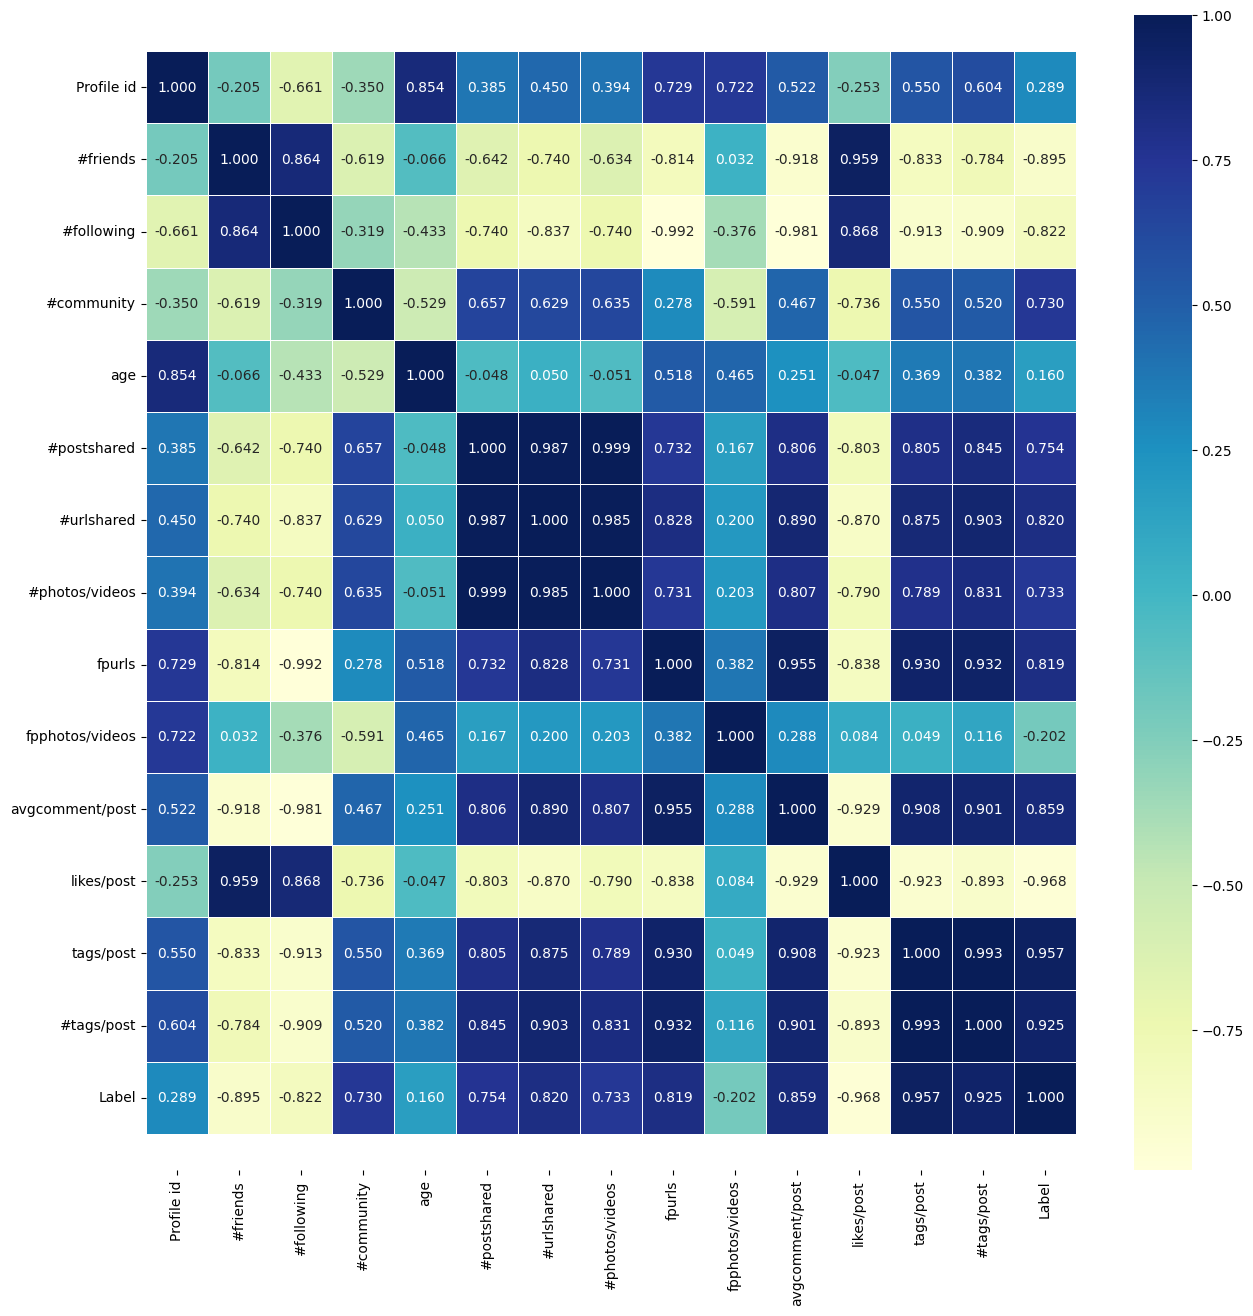

In [10]:
# Let's make our correlation matrix a little prettier
import seaborn as sns
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".3f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Count Number Positive and Negative samples

In [17]:
print(df['Label'].value_counts())

Label
1    3
0    2
Name: count, dtype: int64


**4. Dataset Splitting**

In [20]:
def read_dataset(filename):
    return model_selection.train_test_split(df.drop(['Label'], axis=1), df["Label"], train_size=0.8)

In [21]:
Xtrain, Xtest, Ytrain, Ytest = read_dataset(df)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

**5. Claasification using Machine Learning Algorithm**

**A. SVM**

In [25]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


svm_clf = make_pipeline(StandardScaler(), SVC())
svm_clf.fit(Xtrain, Ytrain)
predictions = svm_clf.predict(Xtest)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(svm_clf, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(svm_clf, Xtrain, Ytrain, Xtest, Ytest, train=False)
joblib.dump(svm_clf, 'twt_svm_model.sav') 

Predictions: 
 [1]

Confusion matrix: 
 [[1]]

Evaluation metrics: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0    1  accuracy  macro avg  weighted avg
precision  1.0  1.0       1.0        1.0           1.0
recall     1.0  1.0       1.0        1.0           1.0
f1-score   1.0  1.0       1.0        1.0           1.0
support    2.0  2.0       1.0        4.0           4.0
_______________________________________________
Confusion Matrix: 
 [[2 0]
 [0 2]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             1  accuracy  macro avg  weighted avg
precision  1.0       1.0        

['twt_svm_model.sav']

**B. KNN**

In [26]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10, weights='distance', p=1)
clf_knn = make_pipeline(StandardScaler(), neigh)
clf_knn.fit(Xtrain, Ytrain)
predictions = clf_knn.predict(Xtest)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(clf_knn, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(clf_knn, Xtrain, Ytrain, Xtest, Ytest, train=False)

joblib.dump(clf_knn, 'clf_knn.sav') 

ValueError: Expected n_neighbors <= n_samples,  but n_samples = 4, n_neighbors = 10

**C. Decision Tree**

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(Xtrain, Ytrain)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(tree_clf, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(tree_clf, Xtrain, Ytrain, Xtest, Ytest, train=False)

joblib.dump(tree_clf, 'twt_dt_model.sav') 

Predictions: 
 [1]

Confusion matrix: 
 [[1]]

Evaluation metrics: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0    1  accuracy  macro avg  weighted avg
precision  1.0  1.0       1.0        1.0           1.0
recall     1.0  1.0       1.0        1.0           1.0
f1-score   1.0  1.0       1.0        1.0           1.0
support    2.0  2.0       1.0        4.0           4.0
_______________________________________________
Confusion Matrix: 
 [[2 0]
 [0 2]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             1  accuracy  macro avg  weighted avg
precision  1.0       1.0        

['twt_dt_model.sav']

**D. Random Forest**

In [29]:
from sklearn.ensemble import RandomForestClassifier
rand_for = RandomForestClassifier(criterion='entropy', n_estimators=100)
clf_rf = make_pipeline(StandardScaler(), rand_for)
clf_rf.fit(Xtrain, Ytrain)
predictions = clf_rf.predict(Xtest)

print('Predictions: \n', predictions)
print('\nConfusion matrix: \n', confusion_matrix(Ytest, predictions))
print('\nEvaluation metrics: \n',classification_report(Ytest, predictions))

print_score(clf_rf, Xtrain, Ytrain, Xtest, Ytest, train=True)
print_score(clf_rf, Xtrain, Ytrain, Xtest, Ytest, train=False)

joblib.dump(clf_rf, 'twt_rf_model.sav') 

Predictions: 
 [1]

Confusion matrix: 
 [[1]]

Evaluation metrics: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0    1  accuracy  macro avg  weighted avg
precision  1.0  1.0       1.0        1.0           1.0
recall     1.0  1.0       1.0        1.0           1.0
f1-score   1.0  1.0       1.0        1.0           1.0
support    2.0  2.0       1.0        4.0           4.0
_______________________________________________
Confusion Matrix: 
 [[2 0]
 [0 2]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             1  accuracy  macro avg  weighted avg
precision  1.0       1.0        

['twt_rf_model.sav']